In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt 

In [2]:
tf.debugging.set_log_device_placement= True

In [3]:
tf.executing_eagerly()

True

In [4]:
x0 = tf.constant(3)

In [5]:
x0.shape

TensorShape([])

In [6]:
x0.dtype

tf.int32

In [7]:
x0.numpy() # numpy representation of tensor


3

In [8]:
result0 = x0+5
result0

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [9]:
x1 = tf.constant([1.1, 2.2 ,3.3, 4.4])
x1

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.1, 2.2, 3.3, 4.4], dtype=float32)>

In [10]:
result1 = x1+5
result1

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.1, 7.2, 8.3, 9.4], dtype=float32)>

In [11]:
x2 = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8]])
x2

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>

In [12]:
x2 = tf.cast(x2, tf.float32)
x2

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]], dtype=float32)>

In [13]:
result3 = tf.multiply(x1, x2)
result3

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 1.1     ,  4.4     ,  9.9     , 17.6     ],
       [ 5.5     , 13.200001, 23.1     , 35.2     ]], dtype=float32)>

In [14]:
arr_x1 = x1.numpy()
arr_x1

array([1.1, 2.2, 3.3, 4.4], dtype=float32)

In [15]:
arr_x4 = np.array([[10, 20], [30, 40], [50, 60]])
arr_x4

array([[10, 20],
       [30, 40],
       [50, 60]])

In [16]:
x4 = tf.convert_to_tensor(arr_x4)
x4

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10, 20],
       [30, 40],
       [50, 60]])>

In [17]:
tf.is_tensor(x2)

True

In [18]:
x2 = np.square(x2)

In [19]:
tf.is_tensor(x2)

False

In [20]:
t0 = tf.zeros([3, 5], tf.int32)
t0

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])>

In [21]:
t0 = tf.reshape(t0, [5,3])
t0

<tf.Tensor: shape=(5, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])>

In [22]:
v1 = tf.Variable([[1, 2, 3], [4, 5, 6]])
v1

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [23]:
def tensorFlow(max_num):
    counter = tf.constant(0)
    max_num = tf.constant(max_num)
    
    for num in range(0, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num%3) ==0  and int(num%5)==0:
            print(num.numpy())
            

In [24]:
tensorFlow(35)

0
15
30


## Simple Linear Regression using gradient tape

In [25]:
# original weight and bias
w_true = 2
b_true = 0.5

In [26]:
# generate data
x = np.linspace(0, 3,130)
y = w_true * x + b_true + np.random.randn(*x.shape) * 0.5

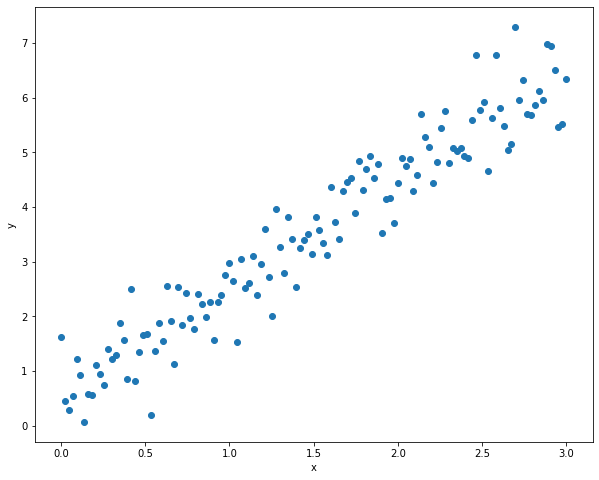

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
class LinearModel:
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name ="W") # assign a random weight and bias
        self.bias = tf.Variable(np.random.randn(), name="b")
        
    def __call__(self, x):
        return self.weight*x + self.bias # model logic

In [29]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred)) # mean squared loss

In [30]:
def train(linear_model, x, y, lr = 0.01):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        current_loss = loss(y, y_pred)
    d_weight, d_bias = tape.gradient(current_loss, [linear_model.weight, linear_model.bias]) # calculate gradient
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

In [31]:
linear_model = LinearModel()

weights, biases = [], []
epochs = 10
lr = 0.15

In [32]:
for epoch_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x, y, lr)
    print(f"Epoch count {epoch_count} : Loss value : {real_loss.numpy()}")

Epoch count 0 : Loss value : 15.981058120727539
Epoch count 1 : Loss value : 0.5846072435379028
Epoch count 2 : Loss value : 0.26720330119132996
Epoch count 3 : Loss value : 0.2605290710926056
Epoch count 4 : Loss value : 0.2602732181549072
Epoch count 5 : Loss value : 0.2601633369922638
Epoch count 6 : Loss value : 0.2600686550140381
Epoch count 7 : Loss value : 0.2599850296974182
Epoch count 8 : Loss value : 0.2599111497402191
Epoch count 9 : Loss value : 0.2598458230495453


In [33]:
linear_model.weight.numpy(), linear_model.bias.numpy(), 

(1.9708638, 0.5861581)

In [34]:
rmse = loss(y, linear_model(x))
rmse.numpy()

0.25978813

In [ ]:
import os
logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callback.TensorBoard(logdir, histogram_freq = 1)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(32,
                                input_shape= (x_train.shape[1], ),
                                activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(1)) # output layer with 1 neuron for single output

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

## Keras Functional API 

In [ ]:
def build_model():
    inputs = tf.keras.Input(shape = (x_train.shape[1],))
    
    #layer1 
    dense_layer1 = layers.Dense(12, activation='relu')
    x = dense_layer1(inputs)
    
    # layer 2 - dropout layer
    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    # layer 3
    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)
    
    prediction_layer = layers.Dense(1, activation='sigmoid')
    predictions = prediction_layer(x)
    model = tf.keras.Model(inputs=inputs, outputs = predictions)
    model.summary()
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer = optimizer,
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = ['accuracy', tf.keras.metrics.Precision(0.5), tf.keras.metrics.Recall(0.5)])
    


## model subclassing in Keras

In [2]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [4]:
class WineClassification(Model):
    def __init__(self, input_shape):
        super(WineClassficationModel, self).__init__()
        self.d1 = layers.Dense(128, activation='relu', input_shape = [input_shape])
        self.d2 = layers.Dense(64, activation='relu')
        
        self.d3 = layers.Dense(3, activation='softmax')
        
    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        
        return x